In [ ]:
import pandas as pd

books = pd.read_csv("/content/books.csv")
print(books.head())


          isbn13      isbn10           title subtitle  \
0  9780002005883  0002005883          Gilead      NaN   
1  9780002261982  0002261987    Spider's Web  A Novel   
2  9780006163831  0006163831    The One Tree      NaN   
3  9780006178736  0006178731  Rage of angels      NaN   
4  9780006280897  0006280897  The Four Loves      NaN   

                           authors                     categories  \
0               Marilynne Robinson                        Fiction   
1  Charles Osborne;Agatha Christie  Detective and mystery stories   
2             Stephen R. Donaldson               American fiction   
3                   Sidney Sheldon                        Fiction   
4              Clive Staples Lewis                 Christian life   

                                           thumbnail  \
0  http://books.google.com/books/content?id=KQZCP...   
1  http://books.google.com/books/content?id=gA5GP...   
2  http://books.google.com/books/content?id=OmQaw...   
3  http://books.go

In [ ]:
books.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6810 entries, 0 to 6809
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   isbn13          6810 non-null   int64  
 1   isbn10          6810 non-null   object 
 2   title           6810 non-null   object 
 3   subtitle        2381 non-null   object 
 4   authors         6738 non-null   object 
 5   categories      6711 non-null   object 
 6   thumbnail       6481 non-null   object 
 7   description     6548 non-null   object 
 8   published_year  6804 non-null   float64
 9   average_rating  6767 non-null   float64
 10  num_pages       6767 non-null   float64
 11  ratings_count   6767 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 638.6+ KB


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


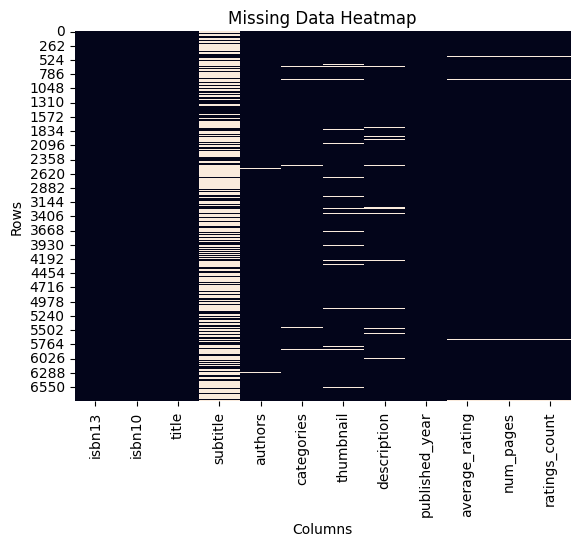

In [ ]:
ax = plt.axes()
sns.heatmap(books.isna(), cbar=False, ax=ax)  # Note: 'char' → should be 'cbar' to hide color bar

plt.xlabel("Columns")   # Only one dot after plt
plt.ylabel("Rows")      # Since heatmap y-axis is rows, better label
plt.title("Missing Data Heatmap")
plt.show()

In [ ]:
import numpy as np
books["missing_description"]=np.where(books["description"].isna(),1,0)
books["age_of_book"]=2025-books["published_year"]

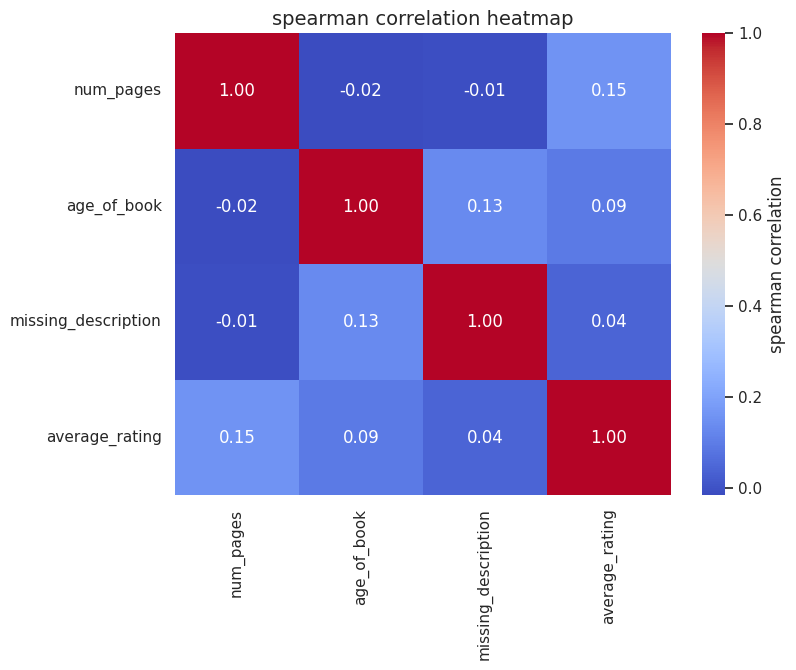

In [ ]:
columns_of_interest=["num_pages","age_of_book","missing_description",'average_rating']

correlation_matrix=books[columns_of_interest].corr(method="spearman")

sns.set_theme(style="white")
plt.figure(figsize=(8,6))
heatmap=sns.heatmap(correlation_matrix,annot=True,fmt=".2f",cmap='coolwarm',cbar_kws={"label":"spearman correlation"})

heatmap.set_title("spearman correlation heatmap",fontsize=14)
plt.show()


In [ ]:
book_missing= books[
    ~(books["description"].isna()) &
  ~(books["num_pages"].isna()) &
    ~(books["average_rating"].isna()) &
    ~(books["published_year"].isna())
]


In [ ]:
book_missing

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0,0,43.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,32.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,0,23.0
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,0,22.0
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,0,26.0
6808,9789027712059,9027712050,The Berlin Phenomenology,NaN,Georg Wilhelm Friedrich Hegel,History,http://books.google.com/books/content?id=Vy7Sk...,Since the three volume edition ofHegel's Philo...,1981.0,0.00,210.0,0.0,0,44.0


In [ ]:
book_missing["categories"].value_counts().reset_index().sort_values("count",ascending=False
)

,categories,count
0,Fiction,2523
1,Juvenile Fiction,534
2,Biography & Autobiography,391
3,History,258
4,Literary Criticism,164
...,...,...
519,"Adventure stories, English",1
518,Germany,1
517,Egypt,1
516,Apartments,1


<ipython-input-10-2124052510>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_counts, x="count", y="category", palette="coolwarm")


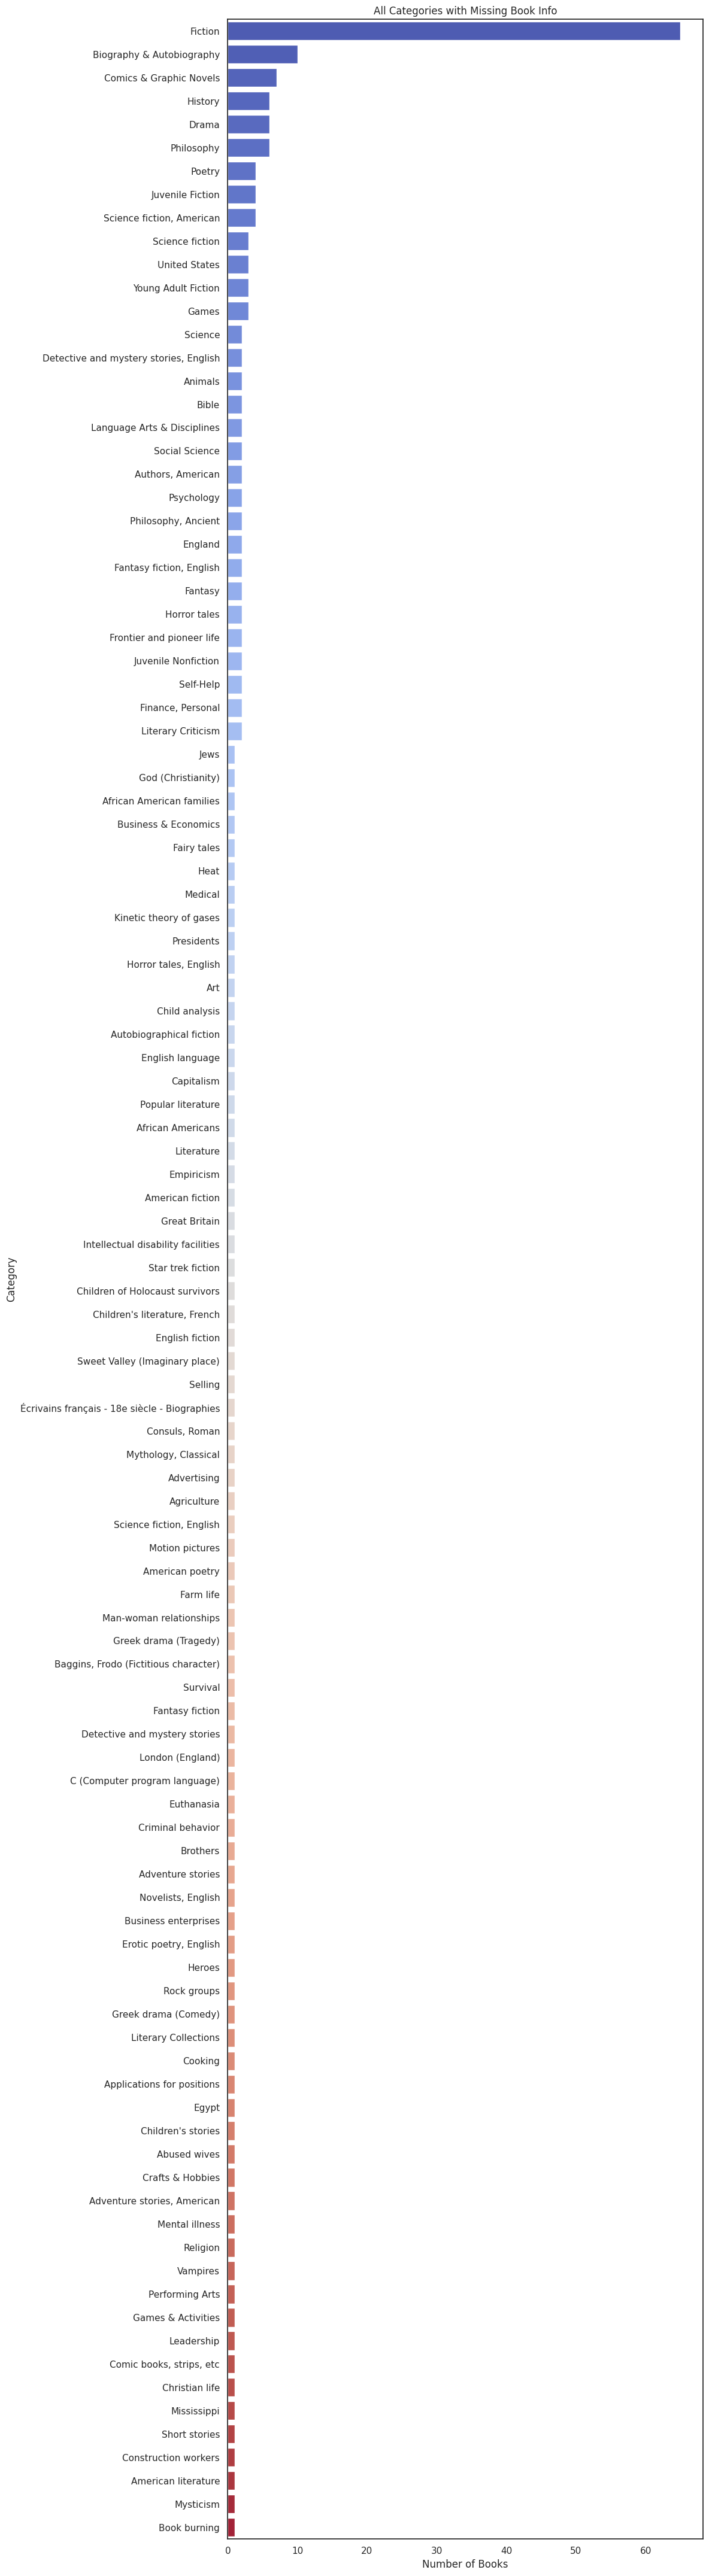

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare the counts again (in case not done yet)
book_missing = books[
    (books["description"].isna()) |
    (books["num_pages"].isna()) |
    (books["average_rating"].isna()) |
    (books["published_year"].isna())
]

category_counts = book_missing["categories"].value_counts().reset_index()
category_counts.columns = ["category", "count"]

# Plot all categories
plt.figure(figsize=(12, len(category_counts) * 0.4))  # Height scales with number of categories

sns.barplot(data=category_counts, x="count", y="category", palette="coolwarm")

plt.title("All Categories with Missing Book Info")
plt.xlabel("Number of Books")
plt.ylabel("Category")
plt.tight_layout()
plt.show()


In [ ]:
book_missing = book_missing.copy()
book_missing["words_in_description"] = book_missing["description"].str.split().str.len()


In [ ]:
book_missing

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book,words_in_description
37,9780006906018,000690601X,The Princess of the Chalet School,NaN,Elinor Mary Brent-Dyer,Juvenile Fiction,http://books.google.com/books/content?id=EJcQP...,NaN,2000.0,4.10,159.0,446.0,1,25.0,NaN
60,9780007127740,000712774X,The illustrated man,NaN,Ray Bradbury,Fiction,http://books.google.com/books/content?id=kePql...,NaN,2002.0,4.14,186.0,56781.0,1,23.0,NaN
99,9780020442806,0020442807,"The Chronicles of Narnia: Lion, the witch and ...",NaN,Clive Staples Lewis,Fairy tales,NaN,NaN,1978.0,4.26,1425.0,1446.0,1,47.0,NaN
102,9780023513206,0023513209,Reason in History,A General Introduction to the Philosophy of Hi...,Georg Wilhelm Friedrich Hegel,Philosophy,http://books.google.com/books/content?id=BCvcY...,NaN,1953.0,3.64,95.0,430.0,1,72.0,NaN
105,9780026995016,0026995018,Spandau,The Secret Diaries,Albert Speer,History,NaN,NaN,1976.0,4.12,463.0,6.0,1,49.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6787,9783464371640,3464371646,About a Boy,NaN,Nick Hornby,NaN,http://books.google.com/books/content?id=PuDYw...,NaN,2002.0,3.80,256.0,155.0,1,23.0,NaN
6788,9783540292128,3540292128,Enzyme-Catalyzed Synthesis of Polymers,NaN,Shiro Kobayashi;Helmut Ritter;David Kaplan,Science,http://books.google.com/books/content?id=WXOym...,NaN,2006.0,0.00,254.0,0.0,1,19.0,NaN
6798,9787506435673,7506435675,Good Fight,NaN,Judd Winick;Matthew Clark,Juvenile Fiction,http://books.google.com/books/content?id=xGPZA...,Presents the adventures of a new group of hero...,2007.0,NaN,NaN,NaN,0,18.0,33.0
6806,9788185944609,8185944601,Secrets Of The Heart,NaN,Khalil Gibran,Mysticism,http://books.google.com/books/content?id=XcrVp...,NaN,1993.0,4.08,74.0,324.0,1,32.0,NaN


In [ ]:
book_missing = books[
    (books["description"].notna()) &                    # Remove rows with NaN in description
    (books["description"].str.strip() != "") &          # Remove rows with empty or whitespace-only descriptions
    (books["num_pages"].notna()) &
    (books["average_rating"].notna()) &
    (books["published_year"].notna())
].copy()

print(book_missing["description"].isna().sum())  # This should be 0 now
print((book_missing["description"].str.strip() == "").sum())  # This should be 0 too



0
0


In [ ]:
book_missing["words_in_description"] = book_missing["description"].str.split().str.len()
book_missing


,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book,words_in_description
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0,199
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0,205
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0,0,43.0,14
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,32.0,57
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,23.0,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,0,23.0,63
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,0,22.0,117
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,0,26.0,174
6808,9789027712059,9027712050,The Berlin Phenomenology,NaN,Georg Wilhelm Friedrich Hegel,History,http://books.google.com/books/content?id=Vy7Sk...,Since the three volume edition ofHegel's Philo...,1981.0,0.00,210.0,0.0,0,44.0,245


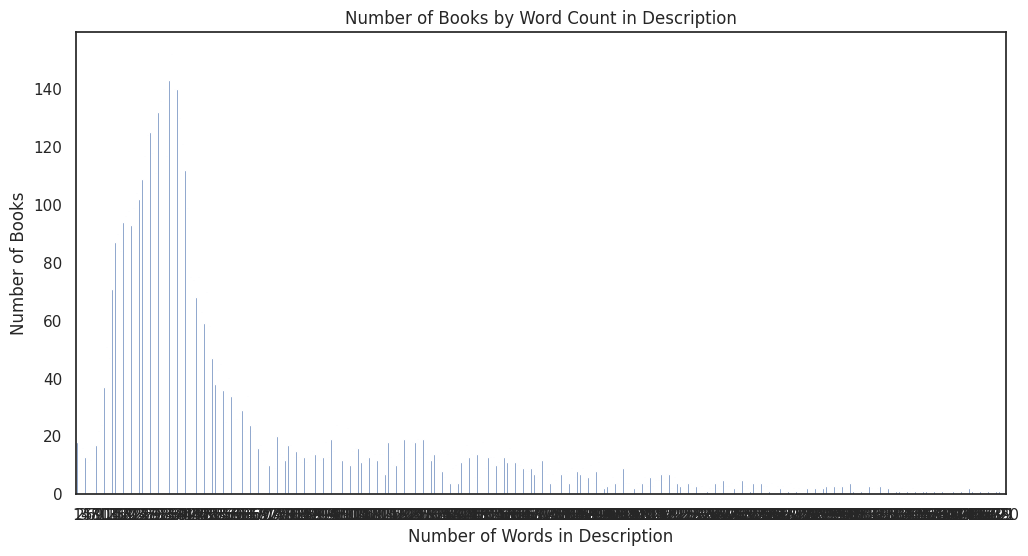

In [ ]:
word_counts = book_missing["words_in_description"].value_counts().sort_index()


import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
word_counts.plot(kind='bar')

plt.title("Number of Books by Word Count in Description")
plt.xlabel("Number of Words in Description")
plt.ylabel("Number of Books")
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.show()


In [ ]:
book_missing.loc[book_missing["words_in_description"].between(1,4),"description"]

,description
6,Donation.
11,Fantasy-roman.
748,Includes bibliographical references.
770,Bound For Oregon (PB)
775,No Marketing Blurb
812,No Marketing Blurb
857,First published in 1813.
944,Edited by Maurice Hindle.
953,DEFOE/ROBINSON CRUSOE (BC)
954,Edited by John Carey.


In [ ]:
book_missing.loc[book_missing["words_in_description"].between(25,34),"description"]


,description
9,Kate Blackwell is an enigma and one of the mos...
14,"Available in the U.S. for the first time, this..."
20,"It is 1937, and Charles Ashworth, a Canon to t..."
21,Reissue of the author's most famous and well-l...
46,No one believes a little girl when she insists...
...,...
6760,"Joel, an English teacher, has never really lik..."
6766,Discusses the historical and intellectual back...
6775,Presents nearly one thousand recipes--from app...
6779,Edited by the creator and executive producer o...


In [ ]:
book_missing_25_words=book_missing[book_missing["words_in_description"]>=25]
book_missing_25_words

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book,words_in_description
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0,199
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0,205
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,32.0,57
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,23.0,45
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,0,23.0,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6802,9788172235222,8172235224,Mistaken Identity,NaN,Nayantara Sahgal,Indic fiction (English),http://books.google.com/books/content?id=q-tKP...,On A Train Journey Home To North India After L...,2003.0,2.93,324.0,0.0,0,22.0,288
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,0,23.0,63
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,0,22.0,117
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,0,26.0,174


In [ ]:
book_missing_25_words["title_and_subtitle"]=(
    np.where(book_missing_25_words["subtitle"].isna(),book_missing_25_words["title"],book_missing_25_words[["title","subtitle"]].astype(str).agg(":".join,axis=1))
)

<ipython-input-19-401759613>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_missing_25_words["title_and_subtitle"]=(


In [ ]:
book_missing_25_words


,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book,words_in_description,title_and_subtitle
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0,199,Gilead
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0,205,Spider's Web:A Novel
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,32.0,57,Rage of angels
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,23.0,45,The Four Loves
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,0,23.0,75,The Problem of Pain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6802,9788172235222,8172235224,Mistaken Identity,NaN,Nayantara Sahgal,Indic fiction (English),http://books.google.com/books/content?id=q-tKP...,On A Train Journey Home To North India After L...,2003.0,2.93,324.0,0.0,0,22.0,288,Mistaken Identity
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,0,23.0,63,Journey to the East
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,0,22.0,117,The Monk Who Sold His Ferrari: A Fable About F...
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,0,26.0,174,I Am that:Talks with Sri Nisargadatta Maharaj


In [ ]:
book_missing_25_words["tagged_description"]=book_missing_25_words[["isbn13","description"]].astype(str).agg(" ".join,axis=1)
book_missing_25_words

<ipython-input-21-476481176>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_missing_25_words["tagged_description"]=book_missing_25_words[["isbn13","description"]].astype(str).agg(" ".join,axis=1)


,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book,words_in_description,title_and_subtitle,tagged_description
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0,199,Gilead,9780002005883 A NOVEL THAT READERS and critics...
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0,205,Spider's Web:A Novel,9780002261982 A new 'Christie for Christmas' -...
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,32.0,57,Rage of angels,"9780006178736 A memorable, mesmerizing heroine..."
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,23.0,45,The Four Loves,9780006280897 Lewis' work on the nature of lov...
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,0,23.0,75,The Problem of Pain,"9780006280934 ""In The Problem of Pain, C.S. Le..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6802,9788172235222,8172235224,Mistaken Identity,NaN,Nayantara Sahgal,Indic fiction (English),http://books.google.com/books/content?id=q-tKP...,On A Train Journey Home To North India After L...,2003.0,2.93,324.0,0.0,0,22.0,288,Mistaken Identity,9788172235222 On A Train Journey Home To North...
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,0,23.0,63,Journey to the East,9788173031014 This book tells the tale of a ma...
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,0,22.0,117,The Monk Who Sold His Ferrari: A Fable About F...,9788179921623 Wisdom to Create a Life of Passi...
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,0,26.0,174,I Am that:Talks with Sri Nisargadatta Maharaj,9788185300535 This collection of the timeless ...


In [ ]:
book_missing_25_words.drop(
    ["subtitle", "missing_description", "age_of_book", "words_in_description"],
    axis=1
).to_csv("books_cleaned.csv", index=False)


In [ ]:
!pip install  pandas matplotlib seaborn python-dotenv \
langchain-community langchain-opencv langchain-chroma \
transformers gradio notebook ipywidgets


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 5.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 58.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 50.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.1/438.1 kB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.0/363.0 kB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.2/284.2 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 50.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 55.0 MB/s eta 0:00:0

In [ ]:
from langchain_community.document_loaders import TextLoader
from langchain_text_splitters import CharacterTextSplitter
from langchain.embeddings import HuggingFaceEmbeddings
from langchain_community.vectorstores import Chroma
from langchain.llms import HuggingFacePipeline
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline


In [ ]:
from dotenv import load_dotenv
load_dotenv()

False

In [ ]:
import pandas as pd
books=pd.read_csv("/content/books_cleaned.csv")

In [ ]:
books["tagged_description"].to_csv("tagged_description.txt",sep="\n",index=False,header=False)


In [ ]:
raw_documents=TextLoader("tagged_description.txt").load()
text_splitter=CharacterTextSplitter(chunk_size=0,chunk_overlap=0,separator='\n')
documents=text_splitter.split_documents(raw_documents)
#Chunksize=0 because it look for closes seperator to the index no indicated by the chunk if it is more then 1 it may split on chunk size make sure spliting on seperator rater then on chunk size

Streaming output truncated to the last 5000 lines.


In [ ]:
documents[0]

Document(metadata={'source': 'tagged_description.txt'}, page_content='9780002005883 A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gi

In [ ]:
#building vector database #create document embending

#db_books=chroma.from_documents(
 #   documents,
#    embedding=openAIEmbeddings()
#)

In [ ]:
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain_chroma import Chroma

embedding = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")

db_books = Chroma.from_documents(
    documents,
    embedding=embedding
)


<ipython-input-29-4079033022>:4: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embedding = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or data

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
query="a book to teach childern abot nature"
docs=db_books.similarity_search(query,k=10)
docs

[Document(id='9e529ce8-fdd4-4a85-9b35-bf7f64e630f5', metadata={'source': 'tagged_description.txt'}, page_content='9780786808069 Children will discover the exciting world of their own backyard in this introduction to familiar animals from cats and dogs to bugs and frogs. The combination of photographs, illustrations, and fun facts make this an accessible and delightful learning experience.'),
 Document(id='25ac22d4-99b3-4138-b9a2-2b07e207548b', metadata={'source': 'tagged_description.txt'}, page_content="9780786808380 Introduce your babies to birds, cats, dogs, and babies through fine art, illustration, and photographs. These books are a rare opportunity to expose little ones to a range of images on a single subject, from simple child's drawings and abstract art to playful photos. A brief text accompanies each image, introducing the baby to some basic -- and sometimes playful -- information about the subjects."),
 Document(id='69f7eb65-93e8-4061-b3db-ad5b77345ef2', metadata={'source': '

In [ ]:
# This line extracts the ISBN13 number from the first document's content (assuming it's the first word),
# converts it to an integer, and then filters the 'books' DataFrame to return the row(s) where the 'isbn13' matches
books[books["isbn13"]==int(docs[0].page_content.split()[0].strip())]

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,title_and_subtitle,tagged_description
3747,9780786808069,0786808063,Baby Einstein: Neighborhood Animals,Marilyn Singer;Julie Aigner-Clark,Juvenile Fiction,http://books.google.com/books/content?id=X9a4P...,Children will discover the exciting world of t...,2001.0,3.89,16.0,180.0,Baby Einstein: Neighborhood Animals,9780786808069 Children will discover the excit...


In [ ]:
import pandas as pd

def retrieve_semantic_recommendations(query: str, top_k: int = 10) -> pd.DataFrame:
    """
    Retrieve top-k book recommendations based on semantic similarity of the query.

    Parameters:
        query (str): The user's search query (e.g., "a book about space and time travel").
        top_k (int): Number of top recommendations to return (default is 10).

    Returns:
        pd.DataFrame: A dataframe of the top_k most relevant books.
    """

    # Search for similar documents in the vector DB using the query
    recs = db_books.similarity_search(query, k=top_k)

    # Extract ISBNs (assuming ISBN13 is the first word in each doc page content)
    books_list = []

    for i in range(0,len(recs)):
      books_list+=[int(recs[i].page_content.strip(' " ').split()[0])]
       # Extract the ISBN13 from the page_content by:
    # 1. Stripping unwanted quotes and spaces
    # 2. Splitting on whitespace
    # 3. Taking the first token and converting it to int

    return books[books["isbn13"].isin(books_list)].head(top_k)
    # Return the top_k books from the DataFrame where isbn13 is in the extracted list



In [ ]:
retrieve_semantic_recommendations("a book to teach childern about nature")

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,title_and_subtitle,tagged_description
324,9780060959036,0060959037,Prodigal Summer,Barbara Kingsolver,Fiction,http://books.google.com/books/content?id=06IwG...,Barbara Kingsolver's fifth novel is a hymn to ...,2001.0,4.00,444.0,85440.0,Prodigal Summer:A Novel,9780060959036 Barbara Kingsolver's fifth novel...
429,9780064434980,0064434982,The Deer in the Wood,Laura Ingalls Wilder,Juvenile Fiction,http://books.google.com/books/content?id=V7YDW...,Even the youngest child can enjoy a special ad...,1999.0,4.17,32.0,302.0,The Deer in the Wood,9780064434980 Even the youngest child can enjo...
1642,9780374522599,0374522596,The Control of Nature,John McPhee,Nature,http://books.google.com/books/content?id=p1qKQ...,The Control of Nature is John McPhee's bestsel...,1990.0,4.24,288.0,3365.0,The Control of Nature,9780374522599 The Control of Nature is John Mc...
3747,9780786808069,0786808063,Baby Einstein: Neighborhood Animals,Marilyn Singer;Julie Aigner-Clark,Juvenile Fiction,http://books.google.com/books/content?id=X9a4P...,Children will discover the exciting world of t...,2001.0,3.89,16.0,180.0,Baby Einstein: Neighborhood Animals,9780786808069 Children will discover the excit...
3748,9780786808373,0786808373,Baby Einstein: Birds,Julie Aigner-Clark,Juvenile Fiction,http://books.google.com/books/content?id=0jxHP...,"Introducing your baby to birds, cats, dogs, an...",2002.0,3.78,20.0,9.0,Baby Einstein: Birds,"9780786808373 Introducing your baby to birds, ..."
3749,9780786808380,0786808381,Baby Einstein: Babies,Julie Aigner-Clark,Juvenile Fiction,http://books.google.com/books/content?id=jv4NA...,"Introduce your babies to birds, cats, dogs, an...",2002.0,4.03,20.0,29.0,Baby Einstein: Babies,"9780786808380 Introduce your babies to birds, ..."
3750,9780786808397,078680839X,Baby Einstein: Dogs,Julie Aigner-Clark,Juvenile Fiction,http://books.google.com/books/content?id=qut8t...,"Introduce your baby to birds, cats, dogs, and ...",2002.0,3.81,20.0,26.0,Baby Einstein: Dogs,"9780786808397 Introduce your baby to birds, ca..."
3765,9780786819119,0786819111,"Baby Einstein: Water, Water Everywhere","Disney Book Group,",Juvenile Fiction,http://books.google.com/books/content?id=tuAdA...,Charming illustrations and playful rhythmic ve...,2003.0,3.70,10.0,77.0,"Baby Einstein: Water, Water Everywhere",9780786819119 Charming illustrations and playf...
3834,9780802431486,0802431488,The 10 Commandments of Parenting,H. Edwin Young,Religion,http://books.google.com/books/content?id=Q1Hxj...,Drawn from years of counseling and the author'...,2005.0,4.00,224.0,25.0,The 10 Commandments of Parenting:The Do's and ...,9780802431486 Drawn from years of counseling a...
4898,9781593851170,1593851170,The Nature of Play,Anthony D. Pellegrini;Peter K. Smith,Psychology,http://books.google.com/books/content?id=Nukz6...,"""Comprehensive and up to date, this tightly ed...",2005.0,4.25,308.0,4.0,The Nature of Play:Great Apes and Humans,"9781593851170 ""Comprehensive and up to date, t..."


text classification  ===to improve the model

In [ ]:
books["categories"].value_counts().reset_index()

,categories,count
0,Fiction,2111
1,Juvenile Fiction,390
2,Biography & Autobiography,311
3,History,207
4,Literary Criticism,124
...,...,...
474,Literary Criticism & Collections,1
475,"Authors, Canadian",1
476,Air pilots,1
477,Community life,1


In [ ]:
# Your mapping dictionary
category_mapping = {
    'fiction': "fiction",
    'juvenile fiction': "children's fiction",
    'biography & autobiography': "nonfiction",
    'history': "nonfiction",
    'literary criticism': "nonfiction",
    'philosophy': "nonfiction",
    'religion': "nonfiction",
    'comics & graphic novels': "fiction",
    'drama': "fiction",
    'juvenile nonfiction': "children's nonfiction",
    'science': "nonfiction",
    'poetry': "fiction"
}

# Convert category to lowercase before mapping (for consistency)
books["simple_category"] = books["categories"].str.lower().map(category_mapping)


In [ ]:
books

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,title_and_subtitle,tagged_description,simple_category
0,9780002005883,0002005883,Gilead,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,Gilead,9780002005883 A NOVEL THAT READERS and critics...,fiction
1,9780002261982,0002261987,Spider's Web,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,Spider's Web:A Novel,9780002261982 A new 'Christie for Christmas' -...,NaN
2,9780006178736,0006178731,Rage of angels,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,Rage of angels,"9780006178736 A memorable, mesmerizing heroine...",fiction
3,9780006280897,0006280897,The Four Loves,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,The Four Loves,9780006280897 Lewis' work on the nature of lov...,NaN
4,9780006280934,0006280935,The Problem of Pain,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,The Problem of Pain,"9780006280934 ""In The Problem of Pain, C.S. Le...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5192,9788172235222,8172235224,Mistaken Identity,Nayantara Sahgal,Indic fiction (English),http://books.google.com/books/content?id=q-tKP...,On A Train Journey Home To North India After L...,2003.0,2.93,324.0,0.0,Mistaken Identity,9788172235222 On A Train Journey Home To North...,NaN
5193,9788173031014,8173031010,Journey to the East,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,Journey to the East,9788173031014 This book tells the tale of a ma...,NaN
5194,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,The Monk Who Sold His Ferrari: A Fable About F...,9788179921623 Wisdom to Create a Life of Passi...,NaN
5195,9788185300535,8185300534,I Am that,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,I Am that:Talks with Sri Nisargadatta Maharaj,9788185300535 This collection of the timeless ...,nonfiction


In [ ]:
books[~(books["simple_category"].isna())]

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,title_and_subtitle,tagged_description,simple_category
0,9780002005883,0002005883,Gilead,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,Gilead,9780002005883 A NOVEL THAT READERS and critics...,fiction
2,9780006178736,0006178731,Rage of angels,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,Rage of angels,"9780006178736 A memorable, mesmerizing heroine...",fiction
8,9780006482079,0006482074,Warhost of Vastmark,Janny Wurts,Fiction,http://books.google.com/books/content?id=uOL0f...,"Tricked once more by his wily half-brother, Ly...",1995.0,4.03,522.0,2966.0,Warhost of Vastmark,9780006482079 Tricked once more by his wily ha...,fiction
30,9780006646006,000664600X,Ocean Star Express,Mark Haddon;Peter Sutton,Juvenile Fiction,http://books.google.com/books/content?id=I2QZA...,Joe and his parents are enjoying a summer holi...,2002.0,3.50,32.0,1.0,Ocean Star Express,9780006646006 Joe and his parents are enjoying...,children's fiction
46,9780007121014,0007121016,Taken at the Flood,Agatha Christie,Fiction,http://books.google.com/books/content?id=3gWlx...,A Few Weeks After Marrying An Attractive Young...,2002.0,3.71,352.0,8852.0,Taken at the Flood,9780007121014 A Few Weeks After Marrying An At...,fiction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5178,9781933648279,1933648279,Night Has a Thousand Eyes,Cornell Woolrich,Fiction,http://books.google.com/books/content?id=3Gk6s...,"""Cornell Woolrich's novels define the essence ...",2007.0,3.77,344.0,680.0,Night Has a Thousand Eyes,"9781933648279 ""Cornell Woolrich's novels defin...",fiction
5188,9784770028969,4770028962,Coin Locker Babies,村上龍,Fiction,http://books.google.com/books/content?id=87DJw...,Rescued from the lockers in which they were le...,2002.0,3.75,393.0,5560.0,Coin Locker Babies,9784770028969 Rescued from the lockers in whic...,fiction
5189,9788122200850,8122200850,"Cry, the Peacock",Anita Desai,Fiction,http://books.google.com/books/content?id=_QKwV...,This book is the story of a young girl obsesse...,1980.0,3.22,218.0,134.0,"Cry, the Peacock",9788122200850 This book is the story of a youn...,fiction
5195,9788185300535,8185300534,I Am that,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,I Am that:Talks with Sri Nisargadatta Maharaj,9788185300535 This collection of the timeless ...,nonfiction


In [ ]:
from transformers import pipeline
fiction_category=["fiction","nonfiction","children's fiction","children's nonfiction"]
# Create a zero-shot classification pipeline using BART (pretrained)
pipe=pipeline("zero-shot-classification",model="facebook/bart-large-mnli")

Device set to use cpu


In [ ]:
# Get the first fiction book description by filtering rows where 'simple_category' is 'fiction',
# selecting the 'description' column, resetting the index, and taking the first value.
sequence=books.loc[books["simple_category"] == "fiction", "description"].reset_index(drop=True)[0]


In [ ]:
pipe(sequence,fiction_category)

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

In [ ]:
# Classify the input text (sequence) using the zero-shot classification pipeline
result = pipe(sequence, fiction_category)

# Get the index of the label with the highest score
max_index = np.argmax(result["scores"])

# Get the label with the highest score (i.e., the predicted category)
max_label = result["labels"][max_index]

# Show the final predicted label
max_label


'fiction'

checking classifier accuracy

In [ ]:
def generate_predictions(sequence, categories):
    """
    Predicts the most likely category for a given text sequence using zero-shot classification.

    Parameters:
        sequence (str): The input text to classify.
        categories (list): A list of category labels to choose from.

    Returns:
        str: The predicted category label with the highest score.
    """
    # Run the zero-shot classification pipeline
    predictions = pipe(sequence, categories)

    # Get the index of the label with the highest score
    max_index = np.argmax(predictions["scores"])

    # Retrieve the label with the highest score
    max_label = predictions["labels"][max_index]

    return max_label


In [ ]:
from tqdm import tqdm

actual_cats = []
predicted_cats = []

# Loop through first 300 rows where the simple_category is 'fiction'
fiction_books = books[books["simple_category"] == "fiction"].reset_index(drop=True)

for i in tqdm(range(min(300, len(fiction_books)))):
    sequence = fiction_books.loc[i, "description"]  # Get the description text
    predicted_cats += [generate_predictions(sequence, fiction_category)]  # Get prediction
    actual_cats += ["fiction"]  # Actual label is fiction


100%|██████████| 300/300 [52:39<00:00, 10.53s/it]


In [ ]:
from tqdm import tqdm

actual_cats = []
predicted_cats = []

# Filter the nonfiction books first and reset index
nonfiction_books = books[books["simple_category"] == "nonfiction"].reset_index(drop=True)

# Loop through the first 300 (or fewer) nonfiction books
for i in tqdm(range(min(300, len(nonfiction_books)))):
    sequence = nonfiction_books.loc[i, "description"]  # Get the description
    predicted_cats += [generate_predictions(sequence, fiction_category)]  # Predict category
    actual_cats += ["nonfiction"]  # True label


100%|██████████| 300/300 [53:22<00:00, 10.67s/it]


In [ ]:
predictions_df = pd.DataFrame({"actual_categories":actual_cats, "predicted_category":predicted_cats})

In [ ]:
predictions_df

,actual_categories,predicted_category
0,nonfiction,nonfiction
1,nonfiction,nonfiction
2,nonfiction,nonfiction
3,nonfiction,fiction
4,nonfiction,nonfiction
...,...,...
295,nonfiction,nonfiction
296,nonfiction,nonfiction
297,nonfiction,fiction
298,nonfiction,nonfiction


In [ ]:
predictions_df["correct_prediction"]=(
    np.where(predictions_df["actual_categories"]==predictions_df["predicted_category"],1,0)

)

In [ ]:
predictions_df["correct_prediction"].sum()/len(predictions_df)

np.float64(0.9366666666666666)

In [ ]:
isbns=[]
predicted_cats=[]

missing_cats = books.loc[books["simple_category"].isna(),["isbn13","description"]].reset_index()

In [ ]:
for i in tqdm(range(0,len(missing_cats))):
  sequence=missing_cats["description"][i]
  predicted_cats +=[generate_predictions(sequence,fiction_category)]
  isbns +=[missing_cats["isbn13"]]

100%|█████████▉| 1438/1442 [4:01:01<00:36,  9.22s/it]

In [ ]:
missing_predicted_df=pd.DataFrame({"isbn13":isbns,"predicted_categories":predicted_cats})
missing_predicted_df

,isbn13,predicted_categories
0,0 9780002261982 1 9780006280897 2 ...,fiction
1,0 9780002261982 1 9780006280897 2 ...,nonfiction
2,0 9780002261982 1 9780006280897 2 ...,nonfiction
3,0 9780002261982 1 9780006280897 2 ...,nonfiction
4,0 9780002261982 1 9780006280897 2 ...,fiction
...,...,...
1437,0 9780002261982 1 9780006280897 2 ...,nonfiction
1438,0 9780002261982 1 9780006280897 2 ...,fiction
1439,0 9780002261982 1 9780006280897 2 ...,nonfiction
1440,0 9780002261982 1 9780006280897 2 ...,nonfiction


In [ ]:
# Ensure both sides have isbn13 as string
books["isbn13"] = books["isbn13"].astype(str)
missing_predicted_df["isbn13"] = missing_predicted_df["isbn13"].astype(str)

# Now merge
books = pd.merge(books, missing_predicted_df, on="isbn13", how="left")

# Fill missing values in 'simple_category' with predicted ones
books["simple_category"] = np.where(
    books["simple_category"].isna(),
    books["predicted_categories"],
    books["simple_category"]
)

# Drop the extra column
books = books.drop(columns=["predicted_categories"])


In [ ]:
books

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,title_and_subtitle,tagged_description,simple_category
0,9780002005883,0002005883,Gilead,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,Gilead,9780002005883 A NOVEL THAT READERS and critics...,fiction
1,9780002261982,0002261987,Spider's Web,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,Spider's Web:A Novel,9780002261982 A new 'Christie for Christmas' -...,NaN
2,9780006178736,0006178731,Rage of angels,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,Rage of angels,"9780006178736 A memorable, mesmerizing heroine...",fiction
3,9780006280897,0006280897,The Four Loves,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,The Four Loves,9780006280897 Lewis' work on the nature of lov...,NaN
4,9780006280934,0006280935,The Problem of Pain,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,The Problem of Pain,"9780006280934 ""In The Problem of Pain, C.S. Le...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5192,9788172235222,8172235224,Mistaken Identity,Nayantara Sahgal,Indic fiction (English),http://books.google.com/books/content?id=q-tKP...,On A Train Journey Home To North India After L...,2003.0,2.93,324.0,0.0,Mistaken Identity,9788172235222 On A Train Journey Home To North...,NaN
5193,9788173031014,8173031010,Journey to the East,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,Journey to the East,9788173031014 This book tells the tale of a ma...,NaN
5194,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,The Monk Who Sold His Ferrari: A Fable About F...,9788179921623 Wisdom to Create a Life of Passi...,NaN
5195,9788185300535,8185300534,I Am that,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,I Am that:Talks with Sri Nisargadatta Maharaj,9788185300535 This collection of the timeless ...,nonfiction


In [ ]:
books[books["categories"].str.lower().isin([

])]

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,title_and_subtitle,tagged_description,simple_category


sementic analysis

In [ ]:
from transformers import pipeline
classifier=pipeline("text-classification",model="j-hartmann/emotion-english-distilroberta-base",return_all_scores=True)
classifier("i love this!")

Device set to use cpu


[[{'label': 'anger', 'score': 0.0016974426107481122},
  {'label': 'disgust', 'score': 0.00042061315616592765},
  {'label': 'fear', 'score': 0.0004598214291036129},
  {'label': 'joy', 'score': 0.9878191947937012},
  {'label': 'neutral', 'score': 0.0014085868606343865},
  {'label': 'sadness', 'score': 0.0033646132797002792},
  {'label': 'surprise', 'score': 0.004829796031117439}]]

In [ ]:
books["description"][0]

'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst the world ha

In [ ]:
classifier(books["description"][0])

[[{'label': 'anger', 'score': 0.003935153596103191},
  {'label': 'disgust', 'score': 0.019100721925497055},
  {'label': 'fear', 'score': 0.6548399329185486},
  {'label': 'joy', 'score': 0.015161491930484772},
  {'label': 'neutral', 'score': 0.1698525846004486},
  {'label': 'sadness', 'score': 0.11640949547290802},
  {'label': 'surprise', 'score': 0.020700670778751373}]]

In [ ]:
#spliting the description into indvidual sentence to classify to get better resullt

classifier(books["description"][0].split("."))

[[{'label': 'anger', 'score': 0.009156372398138046},
  {'label': 'disgust', 'score': 0.002628477057442069},
  {'label': 'fear', 'score': 0.06816234439611435},
  {'label': 'joy', 'score': 0.047942597419023514},
  {'label': 'neutral', 'score': 0.14038586616516113},
  {'label': 'sadness', 'score': 0.002122163074091077},
  {'label': 'surprise', 'score': 0.7296022176742554}],
 [{'label': 'anger', 'score': 0.04047837108373642},
  {'label': 'disgust', 'score': 0.273592084646225},
  {'label': 'fear', 'score': 0.006879053078591824},
  {'label': 'joy', 'score': 0.10908310860395432},
  {'label': 'neutral', 'score': 0.44936978816986084},
  {'label': 'sadness', 'score': 0.09362740814685822},
  {'label': 'surprise', 'score': 0.026970159262418747}],
 [{'label': 'anger', 'score': 0.011031893081963062},
  {'label': 'disgust', 'score': 0.04342268407344818},
  {'label': 'fear', 'score': 0.01408409420400858},
  {'label': 'joy', 'score': 0.014211485162377357},
  {'label': 'neutral', 'score': 0.646215498447

In [ ]:
#cheking is the classifer doing the right job
sentences=books["description"][0].split(".")
predictions= classifier(sentences)

In [ ]:
sentences[0]

'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives'

In [ ]:
predictions[0]

[{'label': 'anger', 'score': 0.009156372398138046},
 {'label': 'disgust', 'score': 0.002628477057442069},
 {'label': 'fear', 'score': 0.06816234439611435},
 {'label': 'joy', 'score': 0.047942597419023514},
 {'label': 'neutral', 'score': 0.14038586616516113},
 {'label': 'sadness', 'score': 0.002122163074091077},
 {'label': 'surprise', 'score': 0.7296022176742554}]

In [ ]:
#to make better descision we are going to take the hights prediction value accros all sentence for the particular emotion

sorted(predictions[0],key=lambda x: x["label"])


[{'label': 'anger', 'score': 0.009156372398138046},
 {'label': 'disgust', 'score': 0.002628477057442069},
 {'label': 'fear', 'score': 0.06816234439611435},
 {'label': 'joy', 'score': 0.047942597419023514},
 {'label': 'neutral', 'score': 0.14038586616516113},
 {'label': 'sadness', 'score': 0.002122163074091077},
 {'label': 'surprise', 'score': 0.7296022176742554}]

In [ ]:
import numpy as np

# Define the possible emotion labels
emotion_labels = ["anger", "disgust", "fear", "joy", "sadness", "surprise", "neutral"]

# Initialize empty lists to store results
isbn = []
emotion_scores = {label: [] for label in emotion_labels}

# Function to calculate the maximum emotion score for each emotion across multiple predictions
def calculate_max_emotion_scores(predictions):
    per_emotion_scores = {label: [] for label in emotion_labels}

    for prediction in predictions:
        # Ensure the predictions are sorted by emotion label so index matches emotion_labels
        sorted_predictions = sorted(prediction, key=lambda x: x["label"])

        for index, label in enumerate(emotion_labels):
            per_emotion_scores[label].append(sorted_predictions[index]["score"])

    # Return max score per emotion
    return {label: np.max(scores) for label, scores in per_emotion_scores.items()}


In [ ]:
for i in range(10):
  isbn.append(books["isbn13"][i])
  sentences=books["description"][i].split(".")
  predictions=classifier(sentences)
  max_score=calculate_max_emotion_scores(predictions)
  for label in emotion_labels:
    emotion_scores[label].append(max_score[label])


In [ ]:
emotion_scores

In [ ]:


emotion_labels = ["anger", "disgust", "fear", "joy", "sadness", "surprise", "neutral"]

# Initialize empty lists to store results
isbn = []
emotion_scores = {label: [] for label in emotion_labels}



for i in tqdm(range(len(books))):
  isbn.append(books["isbn13"][i])
  sentences=books["description"][i].split(".")
  predictions=classifier(sentences)
  max_score=calculate_max_emotion_scores(predictions)
  for label in emotion_labels:
    emotion_scores[label].append(max_score[label])


100%|██████████| 5197/5197 [36:25<00:00,  2.38it/s]


In [ ]:
emotions_df=pd.DataFrame(emotion_scores)
emotions_df["isbn13"]=isbn

In [ ]:
emotions_df

,anger,disgust,fear,joy,sadness,surprise,neutral,isbn13
0,0.064134,0.273592,0.928168,0.932798,0.646215,0.967158,0.729602,9780002005883
1,0.612619,0.348285,0.942528,0.704422,0.887940,0.111690,0.252546,9780002261982
2,0.064134,0.104007,0.972321,0.767239,0.549477,0.111690,0.078765,9780006178736
3,0.351485,0.150722,0.360705,0.251881,0.732685,0.111690,0.078765,9780006280897
4,0.081412,0.184496,0.095043,0.040564,0.884390,0.475880,0.078765,9780006280934
...,...,...,...,...,...,...,...,...
5192,0.148209,0.030643,0.919165,0.255172,0.853721,0.980877,0.030656,9788172235222
5193,0.064134,0.114383,0.051363,0.400263,0.883198,0.111690,0.227765,9788173031014
5194,0.009997,0.009929,0.339217,0.947779,0.375755,0.066685,0.057625,9788179921623
5195,0.064134,0.104007,0.459269,0.759457,0.951104,0.368111,0.078765,9788185300535


In [ ]:
books=pd.merge(books,emotions_df, on = "isbn13")

In [ ]:
books.to_csv("books_with_emotions.csv",index=False)

gradio dashboard


In [ ]:
import pandas as pd
import numpy as np
from dotenv import load_dotenv

In [ ]:
from langchain_community.document_loaders import TextLoader
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain_text_splitters import CharacterTextSplitter
from langchain_chroma import Chroma

import gradio as gr

In [ ]:
load_dotenv()
books = pd.read_csv("books_with_emotions.csv")
books["Large_thumbnail"]=books["thumbnail"] + "&fife=w800" #to get better resolution
books["larger_thumbnail"] = np.where(
    books["Large_thumbnail"].isna(),
    "/content/Book_Cover_Not_Available_Collage-1-1024x817.jpg",
    books["Large_thumbnail"]
)


In [ ]:

from langchain_community.document_loaders import TextLoader
from langchain_text_splitters import CharacterTextSplitter
from langchain_chroma import Chroma
from langchain_community.embeddings import HuggingFaceEmbeddings

#  Load the raw documents (assumes each line is one book description)
raw_documents = TextLoader("tagged_description.txt").load()

# Split the text into chunks by newline (one chunk per line)
text_splitter = CharacterTextSplitter(
    separator="\n",
    chunk_size=0,
    chunk_overlap=0
)
documents = text_splitter.split_documents(raw_documents)

# Use FREE HuggingFace embedding model
embedding = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")

#Build a vector database
db_books = Chroma.from_documents(documents, embedding=embedding)


Streaming output truncated to the last 5000 lines.


In [ ]:
import pandas as pd

def retrieve_semantic_recommendations(
    query: str,
    category: str = None,
    tone: str = None,
    initial_top_k: int = 50,
    final_top_k: int = 16,
) -> pd.DataFrame:
    """
    Retrieve book recommendations using vector search and optionally filter by category or tone.

    Parameters:
        query (str): Natural language query for book search.
        category (str): Filter results by book category (e.g., 'fiction', 'nonfiction').
        tone (str): Filter or sort results based on emotion (e.g., 'happy', 'sad', etc.).
        initial_top_k (int): Number of initial similar documents to fetch.
        final_top_k (int): Number of final results to return after filtering.

    Returns:
        pd.DataFrame: Filtered and sorted DataFrame of recommended books.
    """
    # Step 1: Perform semantic similarity search
    recs = db_books.similarity_search_with_score(query, k=initial_top_k)

    # Step 2: Extract ISBNs from the results
    book_list = [int(rec[0].page_content.strip('"').split()[0]) for rec in recs]

    # Step 3: Filter books by retrieved ISBNs
    book_recs = books[books["isbn13"].isin(book_list)].copy()

    # Step 4: Filter by category if needed
    if category and category != "All":
        book_recs = book_recs[book_recs["simple_category"] == category]

    # Step 5: Sort by tone (emotion) if needed
    if tone == "happy":
        book_recs = book_recs.sort_values(by="joy", ascending=False)
    elif tone == "surprising":
        book_recs = book_recs.sort_values(by="surprise", ascending=False)
    elif tone == "angry":
        book_recs = book_recs.sort_values(by="anger", ascending=False)
    elif tone == "suspenseful":
        book_recs = book_recs.sort_values(by="fear", ascending=False)
    elif tone == "sad":
        book_recs = book_recs.sort_values(by="sadness", ascending=False)

    # Step 6: Return the top final_top_k books
    return book_recs.head(final_top_k)


In [ ]:
import gradio as gr

def recommended_books(query: str, category: str, tone: str):
    recommendations = retrieve_semantic_recommendations(query, category, tone)
    results = []

    for _, row in recommendations.iterrows():
        description = row["description"]
        truncated_desc_split = description.split()
        truncated_description = " ".join(truncated_desc_split[:30]) + "..."

        authors_split = row["authors"].split(";")
        if len(authors_split) == 2:
            authors_str = f"{authors_split[0]} and {authors_split[1]}"
        elif len(authors_split) > 2:
            authors_str = f"{', '.join(authors_split[:-1])} and {authors_split[-1]}"
        else:
            authors_str = row["authors"]

        caption = f"{row['title']} by {authors_str}: {truncated_description}"
        results.append((row["Large_thumbnail"], caption))

    return results

# Category and tone options
categories = ["All"] + sorted(books["simple_category"].dropna().unique())
tones = ["All", "Happy", "Surprising", "Angry", "Suspenseful", "Sad"]

# Gradio UI
with gr.Blocks(theme=gr.themes.Glass()) as dashboard:
    gr.Markdown("## 📚 Semantic Book Recommender")

    with gr.Row():
        user_query = gr.Textbox(label="Please enter a description of a book:",
                                placeholder="e.g., A story about friendship and resilience")
        category_dropdown = gr.Dropdown(choices=categories, label="Select a category:", value="All")
        tone_dropdown = gr.Dropdown(choices=tones, label="Select an emotional tone:", value="All")
        submit_button = gr.Button("Find Recommendations")

    groutput = gr.Gallery(label="Recommended Books", columns=4, rows=2)

    submit_button.click(fn=recommended_books,
                        inputs=[user_query, category_dropdown, tone_dropdown],
                        outputs=groutput)

dashboard.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://1b06513ebe3e6f6704.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
import pandas as pd
import numpy as np
from langchain_community.document_loaders import TextLoader
from langchain_text_splitters import CharacterTextSplitter
from langchain_chroma import Chroma
from sentence_transformers import SentenceTransformer
from langchain_community.embeddings import HuggingFaceEmbeddings
import gradio as gr
from dotenv import load_dotenv

# Load environment variables
load_dotenv()

# Load book data
books = pd.read_csv("books_with_emotions.csv")
books["large_thumbnail"] = np.where(
    books["thumbnail"].isna(),
    "/content/Book_Cover_Not_Available_Collage-1-1024x817.jpg",
    books["thumbnail"] + "&fife=w800"
)

# Create embedding model and vector DB
embedding_model = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")

raw_documents = TextLoader("tagged_description.txt").load()
text_splitter = CharacterTextSplitter(separator="\n", chunk_size=0, chunk_overlap=0)
documents = text_splitter.split_documents(raw_documents)

db_books = Chroma.from_documents(documents, embedding_model)

# Recommendation function
def retrieve_semantic_recommendations(query: str, category: str = None, tone: str = None,
                                      initial_top_k: int = 50, final_top_k: int = 16) -> pd.DataFrame:
    recs = db_books.similarity_search_with_score(query, k=initial_top_k)
    book_list = [int(rec[0].page_content.strip('"').split()[0]) for rec in recs]

    book_recs = books[books["isbn13"].isin(book_list)].copy()

    if category and category.lower() != "all":
        book_recs = book_recs[book_recs["simple_category"].str.lower() == category.lower()]

    if tone and tone.lower() != "all":
        emotion_map = {
            "happy": "joy",
            "surprising": "surprise",
            "angry": "anger",
            "suspenseful": "fear",
            "sad": "sadness"
        }
        tone_key = tone.lower()
        if tone_key in emotion_map:
            book_recs = book_recs.sort_values(by=emotion_map[tone_key], ascending=False)

    return book_recs.head(final_top_k)

def recommend_books(query: str, category: str, tone: str):
    recommendations = retrieve_semantic_recommendations(query, category, tone)
    results = []

    for _, row in recommendations.iterrows():
        description = row["description"]
        truncated_desc_split = description.split()
        truncated_description = " ".join(truncated_desc_split[:30]) + "..."

        authors_split = row["authors"].split(";") if pd.notna(row["authors"]) else []
        if len(authors_split) == 2:
            authors_str = f"{authors_split[0]} and {authors_split[1]}"
        elif len(authors_split) > 2:
            authors_str = f"{', '.join(authors_split[:-1])} and {authors_split[-1]}"
        else:
            authors_str = authors_split[0] if authors_split else "Unknown"

        caption = f"{row['title']} by {authors_str}: {truncated_description}"
        results.append((row["large_thumbnail"], caption))

    return results

# UI
categories = ["All"] + sorted(books["simple_category"].dropna().unique().tolist())
tones = ["All", "Happy", "Surprising", "Angry", "Suspenseful", "Sad"]

dashboard = gr.Blocks(theme=gr.themes.Glass())

with dashboard:
    gr.Markdown("# Semantic Book Recommender")

    with gr.Row():
        user_query = gr.Textbox(label="Describe a book you want to read:",
                                placeholder="e.g., A mystery about a haunted house")
        category_dropdown = gr.Dropdown(choices=categories, label="Select a category:", value="All")
        tone_dropdown = gr.Dropdown(choices=tones, label="Select an emotional tone:", value="All")
        submit_button = gr.Button("Find Recommendations")

    output = gr.Gallery(label="Recommended Books", columns=8, rows=2)

    submit_button.click(fn=recommend_books,
                        inputs=[user_query, category_dropdown, tone_dropdown],
                        outputs=output)

if __name__ == "__main__":
    dashboard.launch()


Streaming output truncated to the last 5000 lines.


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://4dfe379b732a1122de.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
import pandas as pd
import numpy as np
from langchain_community.document_loaders import TextLoader
from langchain_text_splitters import CharacterTextSplitter
from langchain_chroma import Chroma
from sentence_transformers import SentenceTransformer
from langchain_community.embeddings import HuggingFaceEmbeddings
import gradio as gr
from dotenv import load_dotenv

# Load environment variables
load_dotenv()



books = pd.read_csv("books_with_emotions.csv")
books["large_thumbnail"] = books["thumbnail"] + "&fife=w800"
books["large_thumbnail"] = np.where(
    books["large_thumbnail"].isna(),
   "/content/Book_Cover_Not_Available_Collage-1-1024x817.jpg",
    books["large_thumbnail"],
)

# Create embedding model and vector DB
embedding_model = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")

raw_documents = TextLoader("tagged_description.txt").load()
text_splitter = CharacterTextSplitter(separator="\n", chunk_size=0, chunk_overlap=0)
documents = text_splitter.split_documents(raw_documents)

db_books = Chroma.from_documents(documents, embedding_model)



def retrieve_semantic_recommendations(
        query: str,
        category: str = None,
        tone: str = None,
        initial_top_k: int = 50,
        final_top_k: int = 16,
) -> pd.DataFrame:

    recs = db_books.similarity_search(query, k=initial_top_k)
    books_list = [int(rec.page_content.strip('"').split()[0]) for rec in recs]
    book_recs = books[books["isbn13"].isin(books_list)].head(initial_top_k)

    if category != "All":
        book_recs = book_recs[book_recs["simple_categories"] == category].head(final_top_k)
    else:
        book_recs = book_recs.head(final_top_k)

    if tone == "Happy":
        book_recs.sort_values(by="joy", ascending=False, inplace=True)
    elif tone == "Surprising":
        book_recs.sort_values(by="surprise", ascending=False, inplace=True)
    elif tone == "Angry":
        book_recs.sort_values(by="anger", ascending=False, inplace=True)
    elif tone == "Suspenseful":
        book_recs.sort_values(by="fear", ascending=False, inplace=True)
    elif tone == "Sad":
        book_recs.sort_values(by="sadness", ascending=False, inplace=True)

    return book_recs


def recommend_books(
        query: str,
        category: str,
        tone: str
):
    recommendations = retrieve_semantic_recommendations(query, category, tone)
    results = []

    for _, row in recommendations.iterrows():
        description = row["description"]
        truncated_desc_split = description.split()
        truncated_description = " ".join(truncated_desc_split[:30]) + "..."

        authors_split = row["authors"].split(";")
        if len(authors_split) == 2:
            authors_str = f"{authors_split[0]} and {authors_split[1]}"
        elif len(authors_split) > 2:
            authors_str = f"{', '.join(authors_split[:-1])}, and {authors_split[-1]}"
        else:
            authors_str = row["authors"]

        caption = f"{row['title']} by {authors_str}: {truncated_description}"
        results.append((row["large_thumbnail"], caption))
    return results

categories = ["All"] + sorted(books["simple_categories"].unique())
tones = ["All"] + ["Happy", "Surprising", "Angry", "Suspenseful", "Sad"]

with gr.Blocks(theme = gr.themes.Glass()) as dashboard:
    gr.Markdown("# Semantic book recommender")

    with gr.Row():
        user_query = gr.Textbox(label = "Please enter a description of a book:",
                                placeholder = "e.g., A story about forgiveness")
        category_dropdown = gr.Dropdown(choices = categories, label = "Select a category:", value = "All")
        tone_dropdown = gr.Dropdown(choices = tones, label = "Select an emotional tone:", value = "All")
        submit_button = gr.Button("Find recommendations")

    gr.Markdown("## Recommendations")
    output = gr.Gallery(label = "Recommended books", columns = 8, rows = 2)

    submit_button.click(fn = recommend_books,
                        inputs = [user_query, category_dropdown, tone_dropdown],
                        outputs = output)


if __name__ == "__main__":
    dashboard.launch()

Streaming output truncated to the last 5000 lines.


KeyError: 'simple_categories'

In [ ]:
import pandas as pd
import numpy as np
from langchain_community.document_loaders import TextLoader
from langchain_text_splitters import CharacterTextSplitter
from langchain_chroma import Chroma
from sentence_transformers import SentenceTransformer
from langchain_community.embeddings import HuggingFaceEmbeddings
import gradio as gr
from dotenv import load_dotenv

# Load environment variables
load_dotenv()

# Load books data
books = pd.read_csv("books_with_emotions.csv")

# Add fallback thumbnail
books["large_thumbnail"] = books["thumbnail"].astype(str) + "&fife=w800"
books["large_thumbnail"] = np.where(
    books["large_thumbnail"].isna(),
    "/content/Book_Cover_Not_Available_Collage-1-1024x817.jpg",
    books["large_thumbnail"]
)

# Load and embed tagged descriptions
embedding_model = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")
raw_documents = TextLoader("tagged_description.txt").load()
text_splitter = CharacterTextSplitter(separator="\n", chunk_size=0, chunk_overlap=0)
documents = text_splitter.split_documents(raw_documents)
db_books = Chroma.from_documents(documents, embedding_model)

# Semantic search with tone and category filtering
def retrieve_semantic_recommendations(query: str, category: str = "All", tone: str = "All",
                                      initial_top_k: int = 50, final_top_k: int = 16) -> pd.DataFrame:
    recs = db_books.similarity_search(query, k=initial_top_k)
    books_list = [int(rec.page_content.strip('"').split()[0]) for rec in recs]

    # Filter matched books
    book_recs = books[books["isbn13"].isin(books_list)].copy()

    # Category filtering (case-insensitive)
    if category.lower() != "all":
        book_recs = book_recs[
            book_recs["simple_categories"].str.lower() == category.lower()
        ]

    # Tone filtering (emotion scores)
    tone_column_map = {
        "happy": "joy",
        "surprising": "surprise",
        "angry": "anger",
        "suspenseful": "fear",
        "sad": "sadness"
    }
    tone_key = tone.lower()
    if tone_key in tone_column_map:
        book_recs = book_recs.sort_values(by=tone_column_map[tone_key], ascending=False)

    return book_recs.head(final_top_k)

# Formatting output
def recommend_books(query: str, category: str, tone: str):
    recommendations = retrieve_semantic_recommendations(query, category, tone)
    results = []

    for _, row in recommendations.iterrows():
        description = row.get("description", "")
        truncated_description = " ".join(description.split()[:30]) + "..."

        authors = row.get("authors", "")
        authors_split = authors.split(";")
        if len(authors_split) == 2:
            authors_str = f"{authors_split[0]} and {authors_split[1]}"
        elif len(authors_split) > 2:
            authors_str = f"{', '.join(authors_split[:-1])}, and {authors_split[-1]}"
        else:
            authors_str = authors

        caption = f"{row['title']} by {authors_str}: {truncated_description}"
        results.append((row["large_thumbnail"], caption))
    return results

# Gradio interface setup
categories = ["All"] + sorted(books["simple_categories"].dropna().str.title().unique())
tones = ["All", "Happy", "Surprising", "Angry", "Suspenseful", "Sad"]

with gr.Blocks(theme=gr.themes.Glass()) as dashboard:
    gr.Markdown("# 📚 Semantic Book Recommender")

    with gr.Row():
        user_query = gr.Textbox(
            label="Enter a book description:",
            placeholder="e.g., A story about forgiveness and friendship"
        )
        category_dropdown = gr.Dropdown(choices=categories, label="Select a category:", value="All")
        tone_dropdown = gr.Dropdown(choices=tones, label="Select an emotional tone:", value="All")
        submit_button = gr.Button("Find Recommendations")

    gr.Markdown("## Recommendations")
    output = gr.Gallery(label="Recommended Books", columns=4, rows=2, show_label=False)

    submit_button.click(
        fn=recommend_books,
        inputs=[user_query, category_dropdown, tone_dropdown],
        outputs=output
    )

if __name__ == "__main__":
    dashboard.launch()


ModuleNotFoundError: No module named 'langchain_community'